In [1]:
import numpy as np
import matplotlib.pyplot as plt

from blackjack_more import BlackjackMoreEnv

## Q-Learning

In [2]:
def get_bin(state):
    return [min(state[0] - 4, 17), state[1] - 2, int(state[2])]

Q = np.array([[[[np.random.uniform(-0.001, 0.001) for action in range(4)] \
                    for usable_ace in range(2)] \
                    for dealer_val in range(10)] \
                    for player_val in range(18)])

In [3]:
gamma = 0.99

def Q_learning(alpha, epsilon):
    
    game = BlackjackMoreEnv()
    S, reward, can_split, over = game.play()
    S = get_bin(S)

    actions = np.array([0, 1, 2, 3]) if can_split else np.array([0, 1, 2])
    num_actions = 4 if can_split else 3    

    split = True
    total = 0
    flag = 1
    while split:
        over = False
        while not over:

            if np.random.binomial(1, epsilon):
                A = np.random.randint(num_actions)
            else:
                A = np.argmax(Q[S[0]][S[1]][S[2]][actions])

            S_prime, reward, split, over = game.step(A)
            S_prime = get_bin(S_prime)
            total += reward

            actions = np.array([0, 1])
            num_actions = 2

            d = reward + gamma*(np.max(Q[S_prime[0]][S_prime[1]][S_prime[2]][actions]))*(not over) - Q[S[0]][S[1]][S[2]][A]
            Q[S[0]][S[1]][S[2]][A] += alpha * d

            S = S_prime

        
    return total

In [ ]:
Q_results = np.ndarray((5,150000))


for run in range(5):
    Q = np.array([[[[np.random.uniform(-0.001, 0.001) for action in range(4)] \
                    for usable_ace in range(2)] \
                    for dealer_val in range(10)] \
                    for player_val in range(18)])
    
    epsilon = 1
    for epi in range(150000):
        epsilon = max(0.01, epsilon - 1/(150000/2))
        Q_results[run][epi] = Q_learning(0.01, epsilon)
    
    
    print(run)


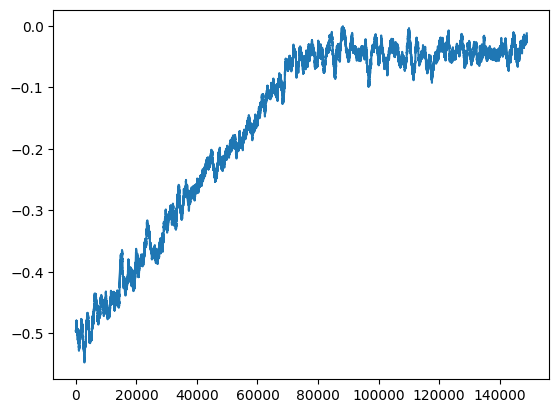

In [5]:
rolling_length = 1000

plt.plot(np.convolve(np.mean(Q_results,axis=0), np.ones(rolling_length), mode="valid") / rolling_length)

## SARSA

In [6]:
gamma = 0.99

def SARSA(alpha, epsilon):
    
    game = BlackjackMoreEnv()
    S, reward, can_split, over = game.play()
    S = get_bin(S)

    actions = np.array([0, 1, 2, 3]) if can_split else np.array([0, 1, 2])
    num_actions = 4 if can_split else 3    

    split = True
    total = 0
    flag = 1
    while split:
        over = False
        while not over:

            if np.random.binomial(1, epsilon):
                A = np.random.randint(num_actions)
            else:
                A = np.argmax(Q[S[0]][S[1]][S[2]][actions])

            S_prime, reward, split, over = game.step(A)
            S_prime = get_bin(S_prime)
            total += reward

            actions = np.array([0, 1])
            num_actions = 2

            if np.random.binomial(1, epsilon):
                A_prime = np.random.randint(2)
            else:
                A_prime = np.argmax(Q[S_prime[0]][S_prime[1]][S_prime[2]])

            d = reward + gamma*(Q[S_prime[0]][S_prime[1]][S_prime[2]][A_prime])*(not over) - Q[S[0]][S[1]][S[2]][A]
            Q[S[0]][S[1]][S[2]][A] += alpha * d

            S = S_prime

        
    return total

In [ ]:
SARSA_results = np.ndarray((5,150000))


for run in range(5):
    Q = np.array([[[[np.random.uniform(-0.001, 0.001) for action in range(4)] \
                    for usable_ace in range(2)] \
                    for dealer_val in range(10)] \
                    for player_val in range(18)])
    
    epsilon = 1
    for epi in range(150000):
        epsilon = max(0.01, epsilon - 1/(150000/2))
        SARSA_results[run][epi] = SARSA(0.01, epsilon)
    
    
    print(run)


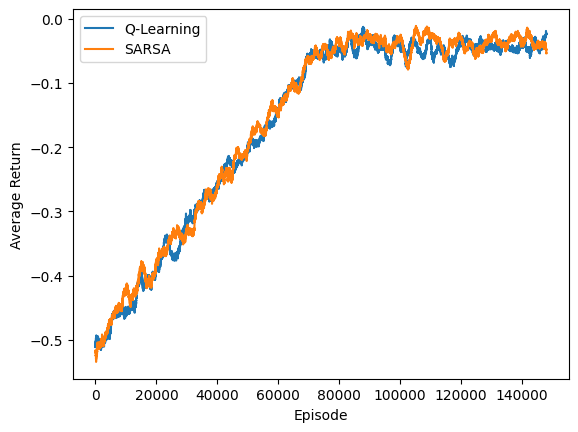

In [9]:
rolling_length = 2000

plt.plot(np.convolve(np.mean(Q_results,axis=0), np.ones(rolling_length), mode="valid") / rolling_length, label='Q-Learning')
plt.plot(np.convolve(np.mean(SARSA_results,axis=0), np.ones(rolling_length), mode="valid") / rolling_length, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Return')
plt.legend()
plt.show()